In [1]:
from nba_api.stats.endpoints import leaguegamelog
from nba_api.stats.static import teams 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from termcolor import colored
import os

pd.options.mode.chained_assignment = None

In [22]:
season = '2023'
teams_info = teams.get_teams()

In [3]:
abbreviations = [x['abbreviation'] for x in teams_info]
print(abbreviations)

['ATL', 'BOS', 'CLE', 'NOP', 'CHI', 'DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MIA', 'MIL', 'MIN', 'BKN', 'NYK', 'ORL', 'IND', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'OKC', 'TOR', 'UTA', 'MEM', 'WAS', 'DET', 'CHA']


In [23]:
players_game_log = leaguegamelog.LeagueGameLog(season = season, player_or_team_abbreviation = 'P').get_data_frames()[0]
players_game_log.head()

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY_PTS,VIDEO_AVAILABLE
0,22023,1629008,Michael Porter Jr.,1610612743,DEN,Denver Nuggets,0022300061,2023-10-24,DEN vs. LAL,W,...,12,2,2,0,0,1,12,12,35.4,1
1,22023,1641721,Maxwell Lewis,1610612747,LAL,Los Angeles Lakers,0022300061,2023-10-24,LAL @ DEN,L,...,0,0,0,0,0,0,0,0,0.0,1
2,22023,2544,LeBron James,1610612747,LAL,Los Angeles Lakers,0022300061,2023-10-24,LAL @ DEN,L,...,8,5,1,0,0,1,21,7,41.1,1
3,22023,202704,Reggie Jackson,1610612743,DEN,Denver Nuggets,0022300061,2023-10-24,DEN vs. LAL,W,...,3,1,1,0,2,0,8,11,14.1,1
4,22023,101108,Chris Paul,1610612744,GSW,Golden State Warriors,0022300062,2023-10-24,GSW vs. PHX,L,...,6,9,2,0,1,0,14,5,39.7,1


In [10]:
league_game_log = leaguegamelog.LeagueGameLog(season = season, player_or_team_abbreviation = 'T').get_data_frames()[0]
league_game_log.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,1610612747,LAL,Los Angeles Lakers,0022300061,2023-10-24,LAL @ DEN,L,240,41,...,31,44,23,5,4,12,18,107,-12,1
1,22023,1610612743,DEN,Denver Nuggets,0022300061,2023-10-24,DEN vs. LAL,W,240,48,...,33,42,29,9,6,12,15,119,12,1
2,22023,1610612756,PHX,Phoenix Suns,0022300062,2023-10-24,PHX @ GSW,W,240,42,...,43,60,23,5,7,19,22,108,4,1
3,22023,1610612744,GSW,Golden State Warriors,0022300062,2023-10-24,GSW vs. PHX,L,240,36,...,31,49,19,11,6,11,23,104,-4,1
4,22023,1610612763,MEM,Memphis Grizzlies,0022300071,2023-10-25,MEM vs. NOP,L,240,38,...,29,37,23,8,7,13,19,104,-7,1


In [11]:
columns = list(league_game_log.columns)[8:-1]
print(columns)

['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS']


In [322]:
games = [
    {
        "home_team": 'NYK',
        "away_team": 'MIL',
        "line": 247.5
    },
    {
        "home_team": 'DEN',
        "away_team": 'GSW',
        "line": 227.5
    },
    {
        "home_team": 'LAL',
        "away_team": 'BOS',
        "line": 228.5
    },
    {
        "home_team": 'MIA',
        "away_team": 'PHI',
        "line": 219.5
    },
    {
        "home_team": 'PHX',
        "away_team": 'DAL',
        "line": 238.5
    },
]

n_last_games = 10

In [323]:
def get_team_games(team, games):
    games_dict = dict()
    games_dict['GAMES'] = games[games['TEAM_ABBREVIATION'] == team]
    games_dict['GAMES_OPP'] = games[(games['MATCHUP'].str.contains(team)) & (games['TEAM_ABBREVIATION'] != team)]
    games_dict['GAMES_HOME'] = games_dict['GAMES'][~games_dict['GAMES']['MATCHUP'].str.contains('@')]
    games_dict['GAMES_HOME_OPP'] = games_dict['GAMES_OPP'][games_dict['GAMES_OPP']['MATCHUP'].str.contains('@')]
    games_dict['GAMES_AWAY'] = games_dict['GAMES'][games_dict['GAMES']['MATCHUP'].str.contains('@')]
    games_dict['GAMES_AWAY_OPP'] = games_dict['GAMES_OPP'][~games_dict['GAMES_OPP']['MATCHUP'].str.contains('@')]
    return games_dict

In [333]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center; padding-right: 86px;"><td style="vertical-align:top">'
        html_str+=f'<h4 style="text-align: center;margin-bottom: 4px;">{title}</h4>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

def get_team_by_game(game_id, team_abv):
    game_players = players_game_log[(players_game_log['GAME_ID'] == game_id) & (players_game_log['TEAM_ABBREVIATION'] == team_abv)].sort_values(by='PTS', ascending=False).iloc[-n_last_games:,:]
    return game_players[['PLAYER_NAME', 'MIN', 'PTS', 'REB', 'AST']].iloc[:5]

def plot_totals_with_line(ax, index, team, games, line, stat):
    last_games = games.iloc[-n_last_games*2:, :]
    dates = last_games['GAME_DATE'].unique()
    totals = last_games.groupby('GAME_DATE')[stat].sum()

    sns.lineplot(x=dates, y=totals, ax=ax[index])

    for i in range(len(dates)):
        host = 'A' if '@' in last_games.iloc[i, :]['MATCHUP'] else 'H'
        ax[index].annotate("{}:{}".format(i + 1, host), (dates[i], totals[i] + 1), fontsize=10)

    title = "{} - {} Totals Progression".format(team, stat)

    ax[index].set_title(title)
    ax[index].set_xlabel('Date')
    ax[index].set_ylabel('{} Totals'.format(stat))

    ax[index].axhline(y=line, color='r', linestyle='-')
    for xc in dates:
        ax[index].axvline(x=xc, color='black', linewidth=0.5)

    ax[index].tick_params(axis='x', labelrotation=90, labelsize=10)

def get_team_made_conceded_pct(games, opp_games, stat, line):
    made = np.array(games[stat])
    conceded = np.array(opp_games[stat])
    totals = made + conceded
    greater = (totals > line).sum()
    pct = greater*100/len(totals)
    return pct

def get_team_totals_info(team, games, line, is_home):
    overall_pct = get_team_made_conceded_pct(games['GAMES'].iloc[-n_last_games:,:], games['GAMES_OPP'].iloc[-n_last_games:,:], stat, line)
    
    totals_info = []
    
    totals_info.append(f"{team} > {line} in {round(overall_pct, 2)}% of last {n_last_games}")
    
    if is_home:
        home_pct = get_team_made_conceded_pct(games['GAMES_HOME'].iloc[-n_last_games:,:], games['GAMES_HOME_OPP'].iloc[-n_last_games:,:], stat, line)
        totals_info.append(f"Home: {team} > {line} in {round(overall_pct, 2)}% of last {n_last_games}")
    else:
        awat_pct = get_team_made_conceded_pct(games['GAMES_AWAY'].iloc[-n_last_games:,:], games['GAMES_AWAY_OPP'].iloc[-n_last_games:,:], stat, line)
        totals_info.append(f"Away: {team} > {line} in {round(awat_pct, 2)}% of last {n_last_games}")
        
    return totals_info
        
def get_team_last_games_info(team):
    games_dict = get_team_games(team, league_game_log)
    last_games = games_dict['GAMES'].iloc[-n_last_games:,:].reset_index(drop=True)
    last_games_opp = games_dict['GAMES_OPP'].iloc[-n_last_games:,:].reset_index(drop=True)
    
    last_games_info = []
    for i, row in last_games.iterrows():
        matchup_char = '@' if '@' in row['MATCHUP'] else 'X'
        opp_stat = last_games_opp.loc[i,stat]
        opp = last_games_opp.loc[i,'TEAM_ABBREVIATION']
        stat_diff = row[stat]-last_games_opp.loc[i,stat]
        
        game_string = f"{i+1}: {team} {row[stat]} {matchup_char} {opp_stat} {opp} // Diff: {stat_diff}"
        
        last_games_info.append(colored(game_string, 'green' if row['WL'] == 'W' else 'red'))
        
    return last_games, last_games_info, games_dict

def display_game_info(game):
    
    home_team = game["home_team"]
    away_team = game["away_team"]
    line = game["line"]
    
    print(f"\n\n{home_team} X {away_team}\n")
    
    fig, axs = plt.subplots(1, 2, figsize=(16, 10))  # 1 row, 2 columns
    
    # Home team
    is_home = True
    
    home_last_games, home_last_games_info, home_games_dict = get_team_last_games_info(home_team)
    home_totals_info = get_team_totals_info(home_team, home_games_dict, line, is_home)
    home_filtered_games = league_game_log[league_game_log['MATCHUP'].str.contains(home_team)]
    
    plot_totals_with_line(axs, 0, home_team, home_filtered_games, line, stat)
    
    # Away team
    is_home = False
    
    away_last_games, away_last_games_info, away_games_dict = get_team_last_games_info(away_team)
    away_totals_info = get_team_totals_info(away_team, away_games_dict, line, is_home)
    away_filtered_games = league_game_log[league_game_log['MATCHUP'].str.contains(away_team)]
    
    plot_totals_with_line(axs, 1, away_team, away_filtered_games, line, stat)
    
    for home_info, away_info in zip(home_last_games_info, away_last_games_info):
        print(f"{home_info.ljust(40)} \t\t\t\t\t {away_info}")
    
    print('\n')
    
    for home_info, away_info in zip(home_totals_info, away_totals_info):
        print(f"{home_info} \t\t\t\t\t {away_info}")
    
    plt.show()
    
    if game.get("show_lineups"):
        home_last_games = home_last_games.to_dict(orient='records')
        away_last_games = away_last_games.to_dict(orient='records')

        for index, (home_info, away_info) in enumerate(zip(home_last_games, away_last_games)):
            home = get_team_by_game(home_info["GAME_ID"], home_team)
            away = get_team_by_game(away_info["GAME_ID"], away_team)
            display_side_by_side(home, away, titles=[f"{home_team} ({index+1})", f"{away_team} ({index+1})"])




NYK X MIL

1: NYK 119 @ 106 TOR // Diff: 13 					 1: MIL 132 X 121 ATL // Diff: 11
2: NYK 122 @ 146 MIL // Diff: -24 					 2: MIL 146 X 122 NYK // Diff: 24
3: NYK 123 @ 133 BOS // Diff: -10 					 3: MIL 119 X 128 IND // Diff: -9
4: NYK 136 X 130 TOR // Diff: 6 					 4: MIL 133 X 129 CHI // Diff: 4
5: NYK 113 @ 117 UTA // Diff: -4 					 5: MIL 140 X 126 IND // Diff: 14
6: NYK 139 @ 122 PHX // Diff: 17 					 6: MIL 146 X 114 DET // Diff: 32
7: NYK 122 @ 144 LAC // Diff: -22 					 7: MIL 128 X 119 HOU // Diff: 9
8: NYK 114 @ 109 LAL // Diff: 5 					 8: MIL 132 X 119 SAS // Diff: 13
9: NYK 121 @ 102 BKN // Diff: 19 					 9: MIL 118 X 114 ORL // Diff: 4
10: NYK 111 X 130 MIL // Diff: -19 					 10: MIL 130 @ 111 NYK // Diff: 19


NYK > 247.5 in 50.0% of last 10 					 MIL > 247.5 in 60.0% of last 10
Home: NYK > 247.5 in 50.0% of last 10 					 Away: MIL > 247.5 in 40.0% of last 10


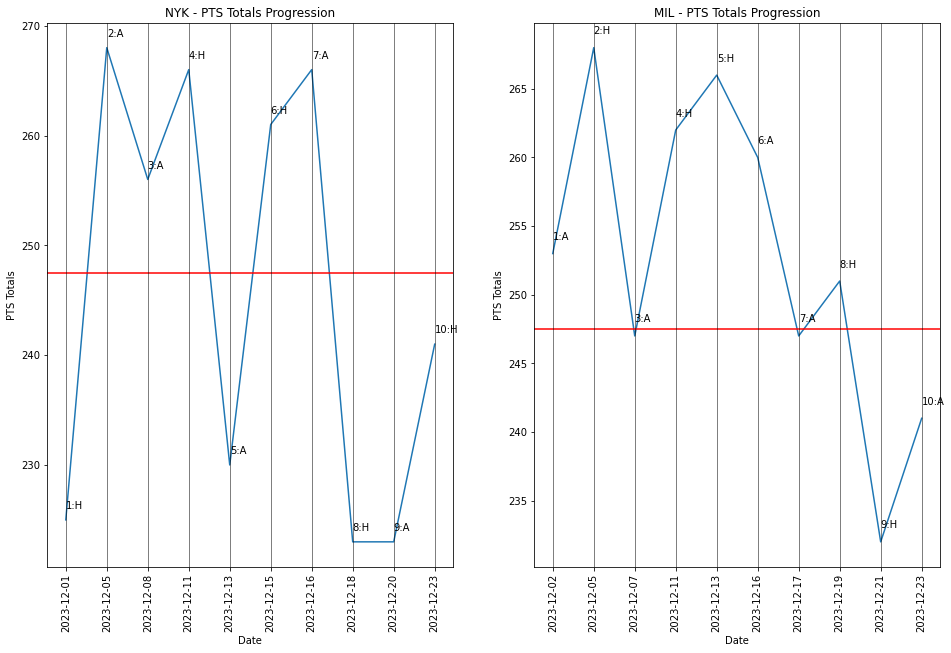



DEN X GSW

1: DEN 102 @ 111 LAC // Diff: -9 					 1: GSW 112 @ 113 LAC // Diff: -1
2: DEN 106 X 114 HOU // Diff: -8 					 2: GSW 110 X 106 POR // Diff: 4
3: DEN 129 @ 122 ATL // Diff: 7 					 3: GSW 136 @ 138 OKC // Diff: -2
4: DEN 114 @ 106 CHI // Diff: 8 					 4: GSW 116 @ 119 PHX // Diff: -3
5: DEN 124 X 101 BKN // Diff: 23 					 5: GSW 113 @ 121 LAC // Diff: -8
6: DEN 117 X 118 OKC // Diff: -1 					 6: GSW 124 X 120 BKN // Diff: 4
7: DEN 130 X 104 DAL // Diff: 26 					 7: GSW 118 @ 114 POR // Diff: 4
8: DEN 113 @ 104 TOR // Diff: 9 					 8: GSW 132 X 126 BOS // Diff: 6
9: DEN 122 @ 117 BKN // Diff: 5 					 9: GSW 129 X 118 WAS // Diff: 11
10: DEN 102 @ 95 CHA // Diff: 7 					 10: GSW 126 X 106 POR // Diff: 20


DEN > 227.5 in 40.0% of last 10 					 GSW > 227.5 in 80.0% of last 10
Home: DEN > 227.5 in 40.0% of last 10 					 Away: GSW > 227.5 in 70.0% of last 10


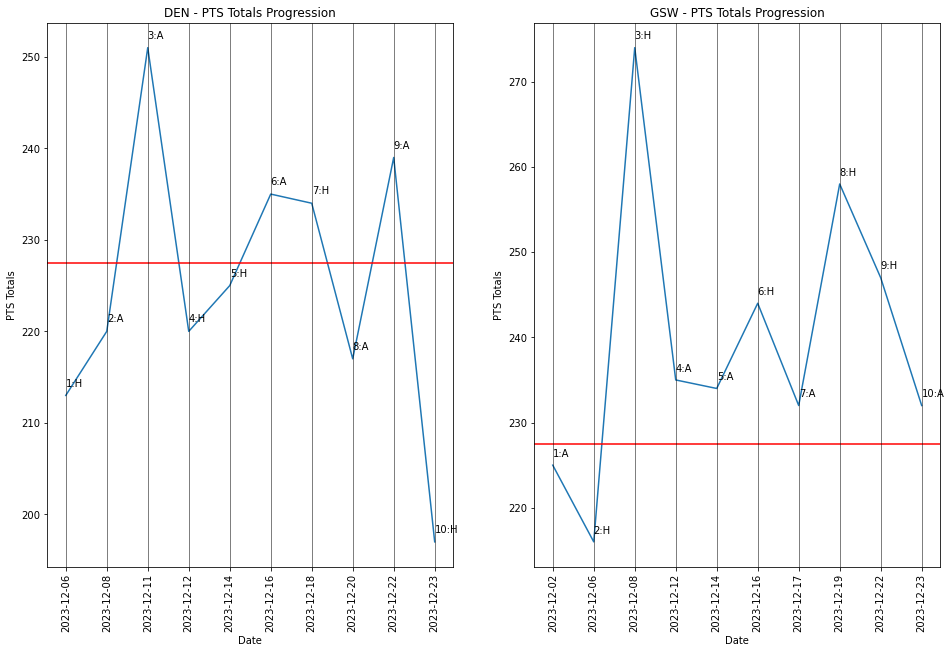



LAL X BOS

1: LAL 107 X 97 HOU // Diff: 10 					 1: BOS 125 X 119 PHI // Diff: 6
2: LAL 106 X 103 PHX // Diff: 3 					 2: BOS 112 @ 122 IND // Diff: -10
3: LAL 133 X 89 NOP // Diff: 44 					 3: BOS 133 X 123 NYK // Diff: 10
4: LAL 125 @ 127 DAL // Diff: -2 					 4: BOS 120 X 113 CLE // Diff: 7
5: LAL 122 @ 119 SAS // Diff: 3 					 5: BOS 116 X 107 CLE // Diff: 9
6: LAL 115 @ 129 SAS // Diff: -14 					 6: BOS 128 X 111 ORL // Diff: 17
7: LAL 109 X 114 NYK // Diff: -5 					 7: BOS 114 X 97 ORL // Diff: 17
8: LAL 108 @ 124 CHI // Diff: -16 					 8: BOS 126 @ 132 GSW // Diff: -6
9: LAL 111 @ 118 MIN // Diff: -7 					 9: BOS 144 @ 119 SAC // Diff: 25
10: LAL 129 @ 120 OKC // Diff: 9 					 10: BOS 145 @ 108 LAC // Diff: 37


LAL > 228.5 in 60.0% of last 10 					 BOS > 228.5 in 80.0% of last 10
Home: LAL > 228.5 in 60.0% of last 10 					 Away: BOS > 228.5 in 50.0% of last 10


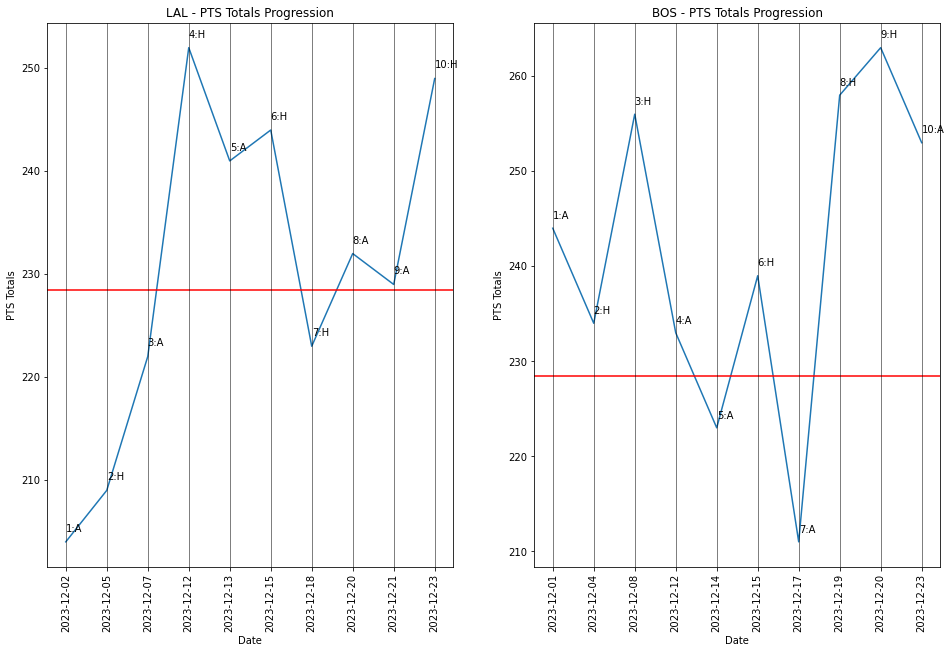



MIA X PHI

1: MIA 129 X 144 IND // Diff: -15 					 1: PHI 119 @ 125 BOS // Diff: -6
2: MIA 112 @ 103 TOR // Diff: 9 					 2: PHI 131 @ 126 WAS // Diff: 5
3: MIA 99 X 111 CLE // Diff: -12 					 3: PHI 125 X 114 ATL // Diff: 11
4: MIA 116 @ 114 CHA // Diff: 2 					 4: PHI 146 X 101 WAS // Diff: 45
5: MIA 115 X 104 CHA // Diff: 11 					 5: PHI 129 @ 111 DET // Diff: 18
6: MIA 116 X 124 CHI // Diff: -8 					 6: PHI 124 X 92 DET // Diff: 32
7: MIA 118 X 116 CHI // Diff: 2 					 7: PHI 135 @ 82 CHA // Diff: 53
8: MIA 108 X 112 MIN // Diff: -4 					 8: PHI 104 X 108 CHI // Diff: -4
9: MIA 115 @ 106 ORL // Diff: 9 					 9: PHI 127 X 113 MIN // Diff: 14
10: MIA 122 X 113 ATL // Diff: 9 					 10: PHI 121 X 111 TOR // Diff: 10


MIA > 219.5 in 70.0% of last 10 					 PHI > 219.5 in 70.0% of last 10
Home: MIA > 219.5 in 70.0% of last 10 					 Away: PHI > 219.5 in 80.0% of last 10


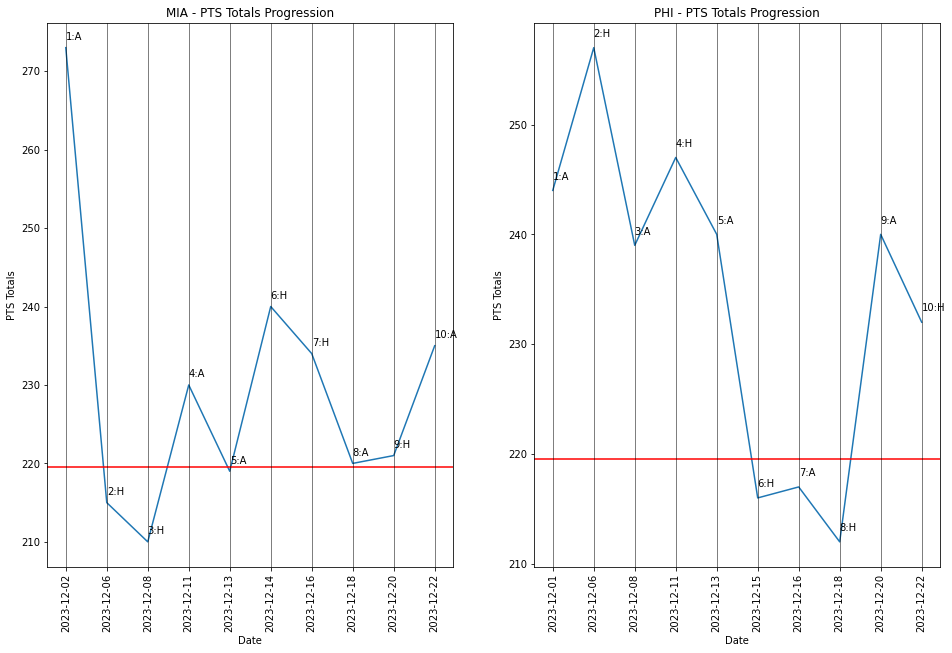



PHX X DAL

1: PHX 111 X 119 DEN // Diff: -8 					 1: DAL 147 X 97 UTA // Diff: 50
2: PHX 116 X 109 MEM // Diff: 7 					 2: DAL 125 @ 112 POR // Diff: 13
3: PHX 103 @ 106 LAL // Diff: -3 					 3: DAL 120 @ 113 MEM // Diff: 7
4: PHX 106 X 114 SAC // Diff: -8 					 4: DAL 127 X 125 LAL // Diff: 2
5: PHX 119 X 116 GSW // Diff: 3 					 5: DAL 101 X 119 MIN // Diff: -18
6: PHX 112 X 116 BKN // Diff: -4 					 6: DAL 131 @ 120 POR // Diff: 11
7: PHX 122 X 139 NYK // Diff: -17 					 7: DAL 104 @ 130 DEN // Diff: -26
8: PHX 112 X 108 WAS // Diff: 4 					 8: DAL 111 X 120 LAC // Diff: -9
9: PHX 104 @ 109 POR // Diff: -5 					 9: DAL 96 @ 122 HOU // Diff: -26
10: PHX 105 @ 120 SAC // Diff: -15 					 10: DAL 144 X 119 SAS // Diff: 25


PHX > 238.5 in 10.0% of last 10 					 DAL > 238.5 in 40.0% of last 10
Home: PHX > 238.5 in 10.0% of last 10 					 Away: DAL > 238.5 in 40.0% of last 10


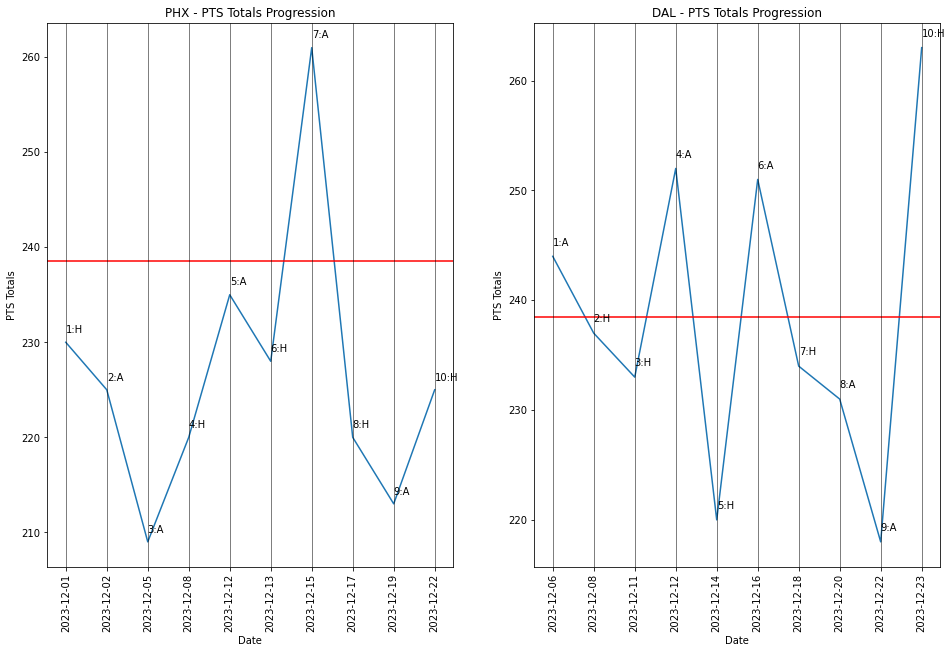

In [334]:
for game in games: display_game_info(game)